In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

study_1 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/EBI ABMR/ABMR - Original GEO Datasets.xls", sheet_name='E-GEOD-46474')
study_1 = study_1[study_1["pvalue"] <0.05]
study_1 = study_1.dropna()

study_2 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/EBI ABMR/ABMR - Original GEO Datasets.xls", sheet_name='E-GEOD-21374_g2_g4')
study_2 = study_2[study_2["pvalue"] <0.05]
study_2 = study_2.dropna()

study_3 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/EBI ABMR/ABMR - Original GEO Datasets.xls", sheet_name='E-GEOD-21374_g1_g3')
study_3 = study_3[study_3["pvalue"] <0.05]
study_3 = study_3.dropna()

study_4 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/EBI ABMR/ABMR - Original GEO Datasets.xls", sheet_name='E-GEOD-14346')
study_4 = study_4[study_4["pvalue"] <0.05]
study_4 = study_4.dropna()

study_5 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/EBI ABMR/ABMR - Original GEO Datasets.xls", sheet_name='E-GEOD-106675')
study_5 = study_5[study_5["pvalue"] <0.05]
study_5 = study_5.dropna()

study_6 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/EBI ABMR/ABMR - Original GEO Datasets.xls", sheet_name='E-GEOD-34437')
study_6 = study_6[study_6["pvalue"] <0.05]
study_6 = study_6.dropna()


abmr_study_1 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/Dr.jegga abmr/drjegga_abmr.xls", sheet_name='ABMR GSE36059')

abmr_study_1 = abmr_study_1[abmr_study_1["adj.P.Val"] <0.05]
abmr_study_1 = abmr_study_1.dropna()

abmr_study_2 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/Dr.jegga abmr/drjegga_abmr.xls", sheet_name='ABMR GSE44131')
abmr_study_2 = abmr_study_2[abmr_study_2["adj.P.Val"] <0.05]
abmr_study_2 = abmr_study_2.dropna()

abmr_study_3 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/Dr.jegga abmr/drjegga_abmr.xls", sheet_name='ABMR GSE50084')
abmr_study_3 = abmr_study_3[abmr_study_3["adj.P.Val"] <0.05]
abmr_study_3 = abmr_study_3.dropna()

abmr_study_4 = pd.read_excel("/Users/rishabhgoel/Desktop/ABMR Analysis/Dr.jegga abmr/drjegga_abmr.xls", sheet_name='ABMR GSE93658')
abmr_study_4 = abmr_study_4[abmr_study_4["adj.P.Val"] <0.05]
abmr_study_4 = abmr_study_4.dropna()

# p450 = pd.read_excel("/Users/rishabhgoel/Desktop/Area Under Curve.xlsx", sheet_name='450')
# p450 = p450[p450["p-value"] <0.05]

p450 = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/P450.csv")
p450 = p450[p450["padj"] <0.05]

# p900 = pd.read_excel("/Users/rishabhgoel/Desktop/Area Under Curve.xlsx", sheet_name='900')
# p900 = p900[p900["p-value"] <0.05]

p900 = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/P900.csv")
p900 = p900[p900["padj"] <0.05]

sf6222 = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/SF_6222.csv")
sf6222 = sf6222[sf6222["padj"] <0.05]

sf7009 = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/SF_7009.csv")
sf7009 = sf7009[sf7009["padj"] <0.05]

sf7044 = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/SF_7044.csv")
sf7044 = sf7044[sf7044["padj"] <0.05]

um101 = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/UM101.csv")
um101 = um101[um101["padj"] <0.05]

tnf = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/TNF.csv")
tnf = tnf[tnf["padj"] <0.05]

placebo = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/Placebo.csv")
placebo = placebo.rename(columns={"p-value":"padj", "protein":"Gene.name"})
placebo = placebo[placebo["padj"] <0.05]
placebo = placebo.groupby('Gene.name').median().reset_index()

placebo_inflammation = pd.read_csv("/Users/rishabhgoel/Desktop/GEn1E Strategy/Drug Data/Placebo_inflammation.csv")
placebo_inflammation = placebo_inflammation.rename(columns={"p-value":"padj", "protein":"Gene.name"})
placebo_inflammation = placebo_inflammation[placebo_inflammation["padj"] <0.05]
placebo_inflammation = placebo_inflammation.groupby('Gene.name').median().reset_index()

abmrA = pd.concat([study_1, study_2, study_3])
abmrA = abmrA.groupby('Gene Name').median().reset_index()
abmrB = pd.concat([abmr_study_1, abmr_study_2, abmr_study_3, abmr_study_4])

abmrB = abmrB[['Gene.symbol','adj.P.Val', 'logFC']]
abmrB = abmrB.rename(columns={"Gene.symbol":"Gene Name", "adj.P.Val":"pvalue", "logFC":"logchange"})

listofstudygenes = abmrB["Gene Name"].to_list()
new_genes = []

for i in listofstudygenes:
    x = i.split("/")[0]
    new_genes.append(x)

abmrB["Gene Name"] = new_genes
abmrB = abmrB.groupby('Gene Name').median().reset_index()

# concatenated_abmr = concatenated_abmr[(concatenated_abmr["logchange"]>1) | (concatenated_abmr["logchange"]<(-1))]

abmrAB = abmrB.merge(abmrA, how='inner', on="Gene Name", left_index=False, right_index=False)


abmrAB["logchange"] = abmrAB[['logchange_x', 'logchange_y']].median(axis=1)


abmrAB = abmrAB[["Gene Name", "pvalue_x", "logchange"]]
abmrAB = abmrAB.groupby('Gene Name').median().reset_index()

# abmrB = abmrB[(abmrB["logchange"]>1)|(abmrB["logchange"]<-1)]
# abmrA = abmrA[(abmrA["logchange"]>1)|(abmrA["logchange"]<-1)]

# corr_check = merged_geo_jegga
# corr_check


# concatenated_geo_jegga = pd.concat([abmrA, abmrB])
# concatenated_geo_jegga = concatenated_geo_jegga.groupby('Gene Name').median().reset_index()
# concatenated_geo_jegga
# abmrA
# abmrA.to_csv("/Users/rishabhgoel/Desktop/ABMR-A.csv")

/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_76749/1483364678.py:78: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  placebo = placebo.groupby('Gene.name').median().reset_index()
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_76749/1483364678.py:86: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  abmrA = abmrA.groupby('Gene Name').median().reset_index()


In [2]:
# concatenated.to_csv("/Users/rishabhgoel/Desktop/Combined_Studies_Median.csv", index=False)
p450_median = p450.groupby('Gene.name').median().reset_index()
p900_median = p900.groupby('Gene.name').median().reset_index()
sf7009_median = sf7009.groupby('Gene.name').median().reset_index()
sf7044_median = sf7044.groupby('Gene.name').median().reset_index()

sf6222_median = sf6222.groupby('Gene.name').median().reset_index()
um101_median = um101.groupby('Gene.name').median().reset_index()
tnf_median = tnf.groupby('Gene.name').median().reset_index()
placebo_median = placebo.groupby('Gene.name').median().reset_index()

merged_table = pd.merge(p450_median, p900_median, on="Gene.name", how="inner")
p450_900_450 = merged_table[['Gene.name', 'padj_x', "log2FoldChange_x"]]
p450_900_900 = merged_table[['Gene.name', 'padj_y', "log2FoldChange_y"]]

merged_table['average'] = (merged_table['log2FoldChange_x'] + merged_table['log2FoldChange_y']) / 2
average_450_900 = merged_table[['Gene.name','average']]

# average_450_900.to_csv("/Users/rishabhgoel/Desktop/Overlap_450_900.csv")
# p450_900 = pd.concat([p450_median, p900_median], axis=0)
# p450_900 = p450_900.groupby('Gene.name').median().reset_index()
# p450_900

/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_76749/2623851279.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sf7009_median = sf7009.groupby('Gene.name').median().reset_index()
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_76749/2623851279.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sf7044_median = sf7044.groupby('Gene.name').median().reset_index()
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_76749/2623851279.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default 

In [3]:
corr_check = abmrAB

average_merge_450_900 = corr_check.merge(average_450_900, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
merge_450 = corr_check.merge(p450_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
merge_900 = corr_check.merge(p900_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
merge_sf7044 = corr_check.merge(sf7044_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)

In [4]:
from scipy.stats import pearsonr


def create_table(disease_column):
    
    global average_merge_450_900
    global merge_450
    global merge_900
    global merge_sf7044
    global merge_sf3030
    global merge_pdgf
    global merge_bvd
    
    average_p900_p450_corr, _ = pearsonr(average_merge_450_900[disease_column], average_merge_450_900["average"])

    p450_corr, _ = pearsonr(merge_450[disease_column], merge_450["log2FoldChange"])

    p900_corr, _ = pearsonr(merge_900[disease_column], merge_900["log2FoldChange"])

    sf7044_corr, _ = pearsonr(merge_sf7044[disease_column], merge_sf7044["log2FoldChange"])
    
#     sf3030_corr, _ = pearsonr(merge_sf3030[disease_column], merge_sf3030["log2FoldChange"])
    
#     pdgf_corr, _ = pearsonr(merge_pdgf[disease_column], merge_pdgf["log2FoldChange"])
    
#     bvd_corr, _ = pearsonr(merge_bvd[disease_column], merge_bvd["log2FoldChange"])
    
    dict_of_correlations = {'Compound Dataset': ["GEn-1124 Proteomics 450mg BID", "GEn-1124 Proteomics 900mg BID", 
                                                "GEn-1124 Proteomics Average", 
                                               "GEn-1124 RNA-Seq"],
                            'Total Genes': [len(p450_median), len(p900_median), 
                            len(average_450_900), len(sf7044_median)],
                            'Overlapping Genes': [len(merge_450), len(merge_900), 
                            len(average_merge_450_900), len(merge_sf7044)],
                            'Correlation with ABMR': [p450_corr, p900_corr, average_p900_p450_corr, sf7044_corr]}

    
    correlation_table = pd.DataFrame.from_dict(dict_of_correlations)
    
    merge_450 = merge_450[["Gene Name", disease_column, "log2FoldChange"]]
    merge_450.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': '450_log_change'}, inplace=True)
    
    merge_900 = merge_900[["Gene Name", disease_column, "log2FoldChange"]]
    merge_900.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': '900_log_change'}, inplace=True)
    
    average_merge_450_900 = average_merge_450_900[["Gene Name", disease_column, "average"]]
    average_merge_450_900 = average_merge_450_900.rename(columns={disease_column: 'GBM_Log_Change', "average": 'avg_450_900_log_change'})
    
    merge_sf7044 = merge_sf7044[["Gene Name", disease_column, "log2FoldChange"]]
    merge_sf7044.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': 'gen1e-1124_log_change'}, inplace=True)
    
#     merge_sf3030 = merge_sf3030[["Gene Name", disease_column, "log2FoldChange"]]
#     merge_sf3030.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': 'gen1e-3030_log_change'}, inplace=True)
    
#     merge_pdgf = merge_pdgf[["Gene Name", disease_column, "log2FoldChange"]]
#     merge_pdgf.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': 'pdgf_log_change'}, inplace=True)
    
#     merge_bvd = merge_bvd[["Gene Name", disease_column, "log2FoldChange"]]
#     merge_bvd.rename(columns={disease_column: 'GBM_Log_Change', 'log2FoldChange': 'bvd_log_change'}, inplace=True)
    
    return correlation_table
#     writer = pd.ExcelWriter('/Users/rishabhgoel/Desktop/ABMR Report Raw Data/Significant ABMR-A Correlation Report.xlsx', engine='xlsxwriter')
#     correlation_table.to_excel(writer, sheet_name='Final Correlation', index=False)
#     merge_450.to_excel(writer, sheet_name='450mg BID Gene Overlap', index=False)
#     merge_900.to_excel(writer, sheet_name='900mg BID Gene Overlap', index=False)
#     average_merge_450_900.to_excel(writer, sheet_name='Avg 450_900 Gene Overlap', index=False)
#     merge_sf7044.to_excel(writer, sheet_name='SF7044 Gene Overlap', index=False)
#     writer.save()
    
correlation_table = create_table("logchange")
correlation_table

,Compound Dataset,Total Genes,Overlapping Genes,Correlation with ABMR
0,GEn-1124 Proteomics 450mg BID,404,35,-0.186154
1,GEn-1124 Proteomics 900mg BID,396,50,-0.176082
2,GEn-1124 Proteomics Average,190,20,0.087749
3,GEn-1124 RNA-Seq,8137,217,-0.226578


In [118]:
merge_placebo_tnf = tnf.merge(placebo, how='inner', on="Gene.name", left_index=False, right_index=False)
# merge_sf7009.to_csv("/Users/rishabhgoel/Desktop/sf7009_drjeggastudies.csv", index=False)
print(merge_placebo_tnf)
print(merge_placebo_tnf.corr())

    disease_name               ID  log2FoldChange        padj_x Gene.name  \
0          drug0  ENSG00000001617       -0.287521  9.280000e-20    SEMA3F   
1          drug0  ENSG00000002549        0.198103  6.130000e-08      LAP3   
2          drug0  ENSG00000003436       -0.402327  9.360000e-33      TFPI   
3          drug0  ENSG00000004468        0.410365  3.370000e-11      CD38   
4          drug0  ENSG00000004478        0.156222  2.147578e-03     FKBP4   
..           ...              ...             ...           ...       ...   
225        drug0  ENSG00000241399       -0.428278  1.330000e-05     CD302   
226        drug0  ENSG00000256043        0.285948  1.469163e-03      CTSO   
227        drug0  ENSG00000256269       -0.352669  7.429840e-04      HMBS   
228        drug0  ENSG00000262655       -0.707904  4.323804e-02     SPON1   
229        drug0  ENSG00000271503        4.946220  0.000000e+00      CCL5   

       padj_y  placebo_area  
0    0.021576      0.267880  
1    0.033132  

In [119]:
merge_placebo_tnf_placebo = merge_placebo_tnf.merge(corr_check, how='inner',on=None, left_on="Gene.name", right_on="Gene Name", left_index=False, right_index=False)
# merge_sf7009.to_csv("/Users/rishabhgoel/Desktop/sf7009_drjeggastudies.csv", index=False)
print(merge_placebo_tnf_placebo)
print(merge_placebo_tnf_placebo.corr())

   disease_name               ID  log2FoldChange         padj_x Gene.name  \
0         drug0  ENSG00000004468        0.410365   3.370000e-11      CD38   
1         drug0  ENSG00000007908        9.446151   0.000000e+00      SELE   
2         drug0  ENSG00000008517        1.128458  5.780000e-183      IL32   
3         drug0  ENSG00000015475        0.583591   2.460000e-26       BID   
4         drug0  ENSG00000019582        1.272464   7.140000e-32      CD74   
5         drug0  ENSG00000025708        0.395382   4.470000e-06      TYMP   
6         drug0  ENSG00000076706        0.126093   1.220000e-05      MCAM   
7         drug0  ENSG00000105329       -0.089255   1.114222e-02     TGFB1   
8         drug0  ENSG00000108691        3.554987   0.000000e+00      CCL2   
9         drug0  ENSG00000125538        3.440156   4.570000e-30      IL1B   
10        drug0  ENSG00000127507        0.838204   1.740000e-08    ADGRE2   
11        drug0  ENSG00000137752        0.546142   6.880000e-09     CASP1   

In [124]:
merge_placebo = corr_check.merge(placebo_inflammation, how='inner', on=None, left_on="Gene Name", right_on="protein", left_index=False, right_index=False)

# merge_sf7009.to_csv("/Users/rishabhgoel/Desktop/sf7009_drjeggastudies.csv", index=False)

print(merge_placebo)
print(merge_placebo.corr())
merge_placebo = merge_placebo[["Gene Name", "logchange", "log2FoldChange"]]
merge_placebo.rename(columns={"logchange": 'ABMR_Log_Change', 'log2FoldChange': 'Placebo_log_change'}, inplace=True)

# merge_placebo.to_excel("/Users/rishabhgoel/Desktop/Correlation With TNF/ABMR A Correlation With Placebo.xlsx", index=False)

   Gene Name  pvalue_x  logchange Gene.name      padj  placebo_area
0     ADGRE2  0.000026   0.680243    ADGRE2  0.009823      0.517442
1        BID  0.000285   0.473000       BID  0.004270     -0.804092
2       C1QA  0.000239   1.195153      C1QA  0.022965     -0.111398
3      CCL21  0.024000   0.762081     CCL21  0.007020     -0.315025
4    CD200R1  0.000418   0.439342   CD200R1  0.012991      0.444437
5       CD22  0.020950   0.411372      CD22  0.037197      0.149168
6      CD244  0.000003   0.620945     CD244  0.025257      0.156295
7        CD4  0.009310   0.683651       CD4  0.040260      0.201583
8       CD48  0.000006   1.419597      CD48  0.011400      0.176217
9       CD84  0.000916   1.054298      CD84  0.040813     -0.135435
10    CLEC7A  0.000042   0.917227    CLEC7A  0.022647      0.151152
11      CST7  0.000065   0.994431      CST7  0.013937      0.562005
12    CXCL10  0.000008   2.027998    CXCL10  0.013126     -0.851833
13      GZMA  0.005440   1.184661      GZMA  0.0

KeyError: "['log2FoldChange'] not in index"

In [ ]:
early_abmr = ["FGFBP2", "GNLY", "CCL4", "CXCL11", "S1PR5", "GBP4", "CXCL10", "TRDC", "KLRD1", "CXCL9"]
full_abmr = ["ROBO4", "SH2D1B", "LYPD5", "CDH5", "HSPA12B", "PLA1A", "RASIP1", "ADAM15", "S1PR5", "MMRN2"]
late_abmr = ["SOST", "EHD3", "NPHS1", "TCEAL1", "CRHBP", "TPM1", "BAG2", "NDNF", "CPE", "DSTN"]

newest_study = ["IDO1", "CXCL10", "IFNG", "GBP1", "PMAIP1"]

newest_study_abmr = merged_geo_jegga[merged_geo_jegga["Gene Name"].isin(newest_study)]
driver_early_abmr = merged_geo_jegga[merged_geo_jegga["Gene Name"].isin(early_abmr)]
driver_full_abmr = merged_geo_jegga[merged_geo_jegga["Gene Name"].isin(full_abmr)]
driver_late_abmr = merged_geo_jegga[merged_geo_jegga["Gene Name"].isin(late_abmr)]

In [139]:
average_merge_450_900 = corr_check.merge(average_450_900, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
print(average_merge_450_900)
average_merge_450_900.corr()
# average_merge_450_900
# merge_450_900_450

   Gene Name  pvalue_x  logchange Gene.name   average
0      CASP1  0.000019   0.790934     CASP1 -0.929819
1      CCL21  0.024000   0.762081     CCL21 -1.850901
2       CCL8  0.001160   0.844009      CCL8 -1.925473
3       CD14  0.000129   0.899257      CD14  3.080594
4       CD1C  0.000041   0.811217      CD1C -0.256597
5       CD48  0.000006   1.419597      CD48 -0.274676
6        CD5  0.007819   0.413939       CD5 -1.000848
7       CD74  0.000005   0.696407      CD74 -0.170792
8       CDH5  0.000389   0.438087      CDH5 -0.302896
9     CSF2RA  0.000041   0.607000    CSF2RA -0.125287
10     GCNT1  0.002884   0.491764     GCNT1  0.410017
11      GZMB  0.000828   0.949303      GZMB -2.146877
12      IL1B  0.000005   0.566573      IL1B -1.852198
13      IL7R  0.013107   1.128413      IL7R -0.249226
14     ITGAM  0.000118   0.671000     ITGAM -0.440138
15      LAYN  0.000126   0.479491      LAYN -0.234800
16      SELE  0.000050   0.708275      SELE -0.254806
17     TGFB1  0.000041   0.6

,pvalue_x,logchange,average
pvalue_x,1.000000,0.077897,-0.256912
logchange,0.077897,1.000000,0.087749
average,-0.256912,0.087749,1.000000


In [127]:
merge_450_900_450 = corr_check.merge(p450_900_450, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
print(merge_450_900_450)
merge_450_900_450.corr()
# merge_450_900_450.to_csv("/Users/rishabhgoel/Desktop/Heatmap Data Kidney ABMR, 450mg, and 900mg.csv", index = False)
# merge_450_900_450

   Gene Name  pvalue_x  logchange Gene.name    padj_x  log2FoldChange_x
0      CASP1  0.000019   0.790934     CASP1  0.045539          0.567158
1      CCL21  0.024000   0.762081     CCL21  0.008849         -1.349042
2       CCL8  0.001160   0.844009      CCL8  0.015569         -1.376700
3       CD14  0.000129   0.899257      CD14  0.000581          0.894858
4       CD1C  0.000041   0.811217      CD1C  0.019795         -0.248483
5       CD48  0.000006   1.419597      CD48  0.008065         -0.222867
6        CD5  0.007819   0.413939       CD5  0.001336         -0.589142
7       CD74  0.000005   0.696407      CD74  0.013433         -0.154892
8       CDH5  0.000389   0.438087      CDH5  0.002841         -0.408733
9     CSF2RA  0.000041   0.607000    CSF2RA  0.013019         -0.060692
10     GCNT1  0.002884   0.491764     GCNT1  0.003224          0.530117
11      GZMB  0.000828   0.949303      GZMB  0.019806         -2.349367
12      IL1B  0.000005   0.566573      IL1B  0.042953         -0

,pvalue_x,logchange,padj_x,log2FoldChange_x
pvalue_x,1.000000,0.077897,-0.294418,-0.304794
logchange,0.077897,1.000000,-0.029653,-0.085019
padj_x,-0.294418,-0.029653,1.000000,0.004707
log2FoldChange_x,-0.304794,-0.085019,0.004707,1.000000


In [128]:
merge_450_900_900 = corr_check.merge(p450_900_900, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
print(merge_450_900_900)
merge_450_900_900.corr()
# merge_450_900_900
# merge_450_900_450

   Gene Name  pvalue_x  logchange Gene.name    padj_y  log2FoldChange_y
0      CASP1  0.000019   0.790934     CASP1  0.026183         -2.426797
1      CCL21  0.024000   0.762081     CCL21  0.005190         -2.352760
2       CCL8  0.001160   0.844009      CCL8  0.001771         -2.474247
3       CD14  0.000129   0.899257      CD14  0.001286          5.266330
4       CD1C  0.000041   0.811217      CD1C  0.017830         -0.264712
5       CD48  0.000006   1.419597      CD48  0.014736         -0.326485
6        CD5  0.007819   0.413939       CD5  0.000235         -1.412555
7       CD74  0.000005   0.696407      CD74  0.001770         -0.186692
8       CDH5  0.000389   0.438087      CDH5  0.042366         -0.197058
9     CSF2RA  0.000041   0.607000    CSF2RA  0.002151         -0.189883
10     GCNT1  0.002884   0.491764     GCNT1  0.039139          0.289917
11      GZMB  0.000828   0.949303      GZMB  0.049535         -1.944388
12      IL1B  0.000005   0.566573      IL1B  0.028341         -3

,pvalue_x,logchange,padj_y,log2FoldChange_y
pvalue_x,1.000000,0.077897,-0.224452,-0.203165
logchange,0.077897,1.000000,0.052497,0.147303
padj_y,-0.224452,0.052497,1.000000,-0.149904
log2FoldChange_y,-0.203165,0.147303,-0.149904,1.000000


In [175]:

# import seaborn as sns
# import matplotlib.pyplot as plt
# result = merge_450_900_900.pivot(index='Gene Name', columns='logchange', values='log2FoldChange_y')
# result
# p1 = sns.heatmap(merge_450_900_900)

In [176]:
# merge_salmonella = salmonella.merge(sf7044_median, how='inner', on=None, left_on="SYMBOL", right_on="Gene.name", left_index=False, right_index=False)
# print(merge_salmonella)
# merge_salmonella.corr()


In [140]:
merge_450 = corr_check.merge(p450_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
print(merge_450)
merge_450.corr()
# merge_450
# merge_450.to_csv("/Users/rishabhgoel/Desktop/450_studies.csv", index=False)

# disgenet_genes = disgenet["Gene"].to_list()
# disgenet_merge_450 = merge_450[merge_450["Gene Name"].isin(disgenet_genes)]

# disgenet_merge_450.to_csv("/Users/rishabhgoel/Desktop/disgenet_450_studies.csv", index=False)
# print(disgenet_merge_450)

# disgenet_merge_450.corr()

# corr450 = merge_450["logchange"].corr(merge_450['log2FoldChange']) 

   Gene Name  pvalue_x  logchange Gene.name      padj  log2FoldChange
0        BID  0.000285   0.473000       BID  0.004270        0.451125
1      CASP1  0.000019   0.790934     CASP1  0.045539        0.567158
2      CCL21  0.024000   0.762081     CCL21  0.008849       -1.349042
3       CCL5  0.013150   1.144968      CCL5  0.037909       -1.462692
4       CCL8  0.001160   0.844009      CCL8  0.015569       -1.376700
5       CD14  0.000129   0.899257      CD14  0.000581        0.894858
6       CD1C  0.000041   0.811217      CD1C  0.019795       -0.248483
7       CD22  0.020950   0.411372      CD22  0.037197       -0.148308
8      CD244  0.000003   0.620945     CD244  0.025257       -0.192783
9       CD48  0.000006   1.419597      CD48  0.008065       -0.222867
10       CD5  0.007819   0.413939       CD5  0.001336       -0.589142
11      CD74  0.000005   0.696407      CD74  0.013433       -0.154892
12      CD84  0.000916   1.054298      CD84  0.040813       -0.831467
13      CDH5  0.0003

,pvalue_x,logchange,padj,log2FoldChange
pvalue_x,1.000000,0.366664,0.072226,-0.171560
logchange,0.366664,1.000000,0.063576,-0.186154
padj,0.072226,0.063576,1.000000,-0.091666
log2FoldChange,-0.171560,-0.186154,-0.091666,1.000000


In [141]:
merge_900 = corr_check.merge(p900_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
print(merge_900)
merge_900.corr()
# 
# merge_900.to_csv("/Users/rishabhgoel/Desktop/900_studies.csv", index=False)
# disgenet_merge_900 = merge_900[merge_900["Gene Name"].isin(disgenet_genes)]

# disgenet_merge_900.to_csv("/Users/rishabhgoel/Desktop/disgenet_900_studies.csv", index=False)
# print(disgenet_merge_900)

# disgenet_merge_900.corr()

# corr900 = merge_900["logchange"].corr(merge_900['log2FoldChange']) 



   Gene Name      pvalue_x  logchange Gene.name      padj  log2FoldChange  \
0     ADGRE2  2.580000e-05   0.680243    ADGRE2  0.009823        2.194368   
1       AIF1  3.708000e-04   0.729284      AIF1  0.007215       -1.217818   
2   ARHGAP25  1.290000e-04   0.783463  ARHGAP25  0.004739       -0.734730   
3       C1QA  2.390000e-04   1.195153      C1QA  0.022965       -0.464562   
4      CASP1  1.885000e-05   0.790934     CASP1  0.026183       -2.426797   
5       CCL2  1.655000e-02   0.646827      CCL2  0.012360       -0.880955   
6      CCL21  2.400000e-02   0.762081     CCL21  0.005190       -2.352760   
7       CCL8  1.160000e-03   0.844009      CCL8  0.001771       -2.474247   
8       CD14  1.290000e-04   0.899257      CD14  0.001286        5.266330   
9      CD163  4.685000e-03   1.086643     CD163  0.011499       -0.422827   
10      CD1C  4.080000e-05   0.811217      CD1C  0.017830       -0.264712   
11   CD200R1  4.182770e-04   0.439342   CD200R1  0.012991       -0.449828   

,pvalue_x,logchange,padj,log2FoldChange,abs_log
pvalue_x,1.000000,-0.132778,-0.293643,0.008578,-0.067515
logchange,-0.132778,1.000000,-0.131416,-0.176082,0.256473
padj,-0.293643,-0.131416,1.000000,-0.047001,-0.243273
log2FoldChange,0.008578,-0.176082,-0.047001,1.000000,-0.247145
abs_log,-0.067515,0.256473,-0.243273,-0.247145,1.000000


In [142]:
merge_sf7044 = corr_check.merge(sf7044_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_sf7044.to_csv("/Users/rishabhgoel/Desktop/sf7044_drjeggastudies.csv", index=False)
print(merge_sf7044)
merge_sf7044.corr()
# merge_sf7044

    Gene Name      pvalue_x  logchange Gene.name  log2FoldChange          padj
0       ACAA1  1.770000e-02  -0.459272     ACAA1       -0.208703  3.613051e-03
1       ACKR1  2.950000e-07   0.912763     ACKR1       -0.425452  1.471257e-03
2       ACSL5  5.442000e-05   0.638195     ACSL5       -0.361797  2.100000e-06
3      ADAM19  3.310000e-05   0.472745    ADAM19       -0.253525  1.090000e-08
4      ADGRE2  2.580000e-05   0.680243    ADGRE2       -0.551907  5.766800e-04
..        ...           ...        ...       ...             ...           ...
212      VCAN  2.428053e-02   0.765000      VCAN        0.402082  5.100000e-19
213     VEPH1  3.930000e-02  -0.455723     VEPH1        0.396118  2.510000e-16
214       VWF  1.350000e-03   0.675428       VWF        0.261576  3.060000e-06
215      XAF1  1.910000e-02   0.664000      XAF1       -0.854546  1.478570e-04
216    ZNF718  3.250000e-02  -0.342500    ZNF718       -0.930142  4.690000e-08

[217 rows x 6 columns]


,pvalue_x,logchange,log2FoldChange,padj
pvalue_x,1.000000,-0.270148,-0.007089,-0.017652
logchange,-0.270148,1.000000,-0.226578,-0.199269
log2FoldChange,-0.007089,-0.226578,1.000000,0.050652
padj,-0.017652,-0.199269,0.050652,1.000000


In [180]:
merge_sf6222 = corr_check.merge(sf6222_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_sf6222.to_csv("/Users/rishabhgoel/Desktop/sf6222_drjeggastudies.csv", index=False)
print(merge_sf6222)
merge_sf6222.corr()

   Gene Name        pvalue  logchange Gene.name  log2FoldChange           padj
0      ACKR1  2.950000e-07   1.225526     ACKR1       -0.261820   2.915386e-02
1     ANKRD1  4.820000e-02   1.840000    ANKRD1        0.065603   5.295775e-03
2   APOBEC3G  3.435000e-05   1.020000  APOBEC3G       -1.519882   1.210000e-20
3         C3  4.000000e-02   1.066107        C3       -1.081033   8.980000e-35
4       CD37  2.580000e-06   1.355402      CD37       -1.551395   8.220000e-06
5       CD38  7.788900e-04   1.316969      CD38       -0.605317   5.660000e-22
6       CD69  1.230000e-05   1.241769      CD69        1.132008   1.990000e-07
7      CDH13  9.270000e-04   1.056587     CDH13        0.201570   4.420000e-15
8       CPA3  1.390000e-02   1.150000      CPA3        0.588472   6.513343e-03
9     CXCL10  8.405000e-06   2.055996    CXCL10       -4.752709   5.160000e-52
10    CXCL11  2.900000e-07   2.269632    CXCL11       -1.799836   8.070000e-12
11    DOCK10  2.772500e-04   1.058553    DOCK10     

,pvalue,logchange,log2FoldChange,padj
pvalue,1.000000,0.144567,0.034146,-0.080058
logchange,0.144567,1.000000,-0.211064,0.175105
log2FoldChange,0.034146,-0.211064,1.000000,0.284292
padj,-0.080058,0.175105,0.284292,1.000000


In [181]:
# merge_sf7009.to_csv("/Users/rishabhgoel/Desktop/sf7009_drjeggastudies.csv", index=False)
print(merge_sf7009)
merge_sf7009.corr()

   Gene Name        pvalue  logchange Gene.name  log2FoldChange           padj
0     ANKRD1  4.820000e-02   1.840000    ANKRD1        0.591751   3.400000e-25
1   APOBEC3G  3.435000e-05   1.020000  APOBEC3G       -1.709658   2.940000e-21
2         C3  4.000000e-02   1.066107        C3       -1.072587   6.810000e-34
3       CD37  2.580000e-06   1.355402      CD37       -1.313680   2.376030e-04
4       CD38  7.788900e-04   1.316969      CD38       -0.566645   7.660000e-17
5      CDH13  9.270000e-04   1.056587     CDH13        0.257677   8.210000e-17
6         CP  1.039725e-02   1.225025        CP        0.445843   1.741894e-02
7       CPA3  1.390000e-02   1.150000      CPA3        0.796221   3.342289e-04
8     CXCL10  8.405000e-06   2.055996    CXCL10       -4.461649   1.160000e-19
9     CXCL11  2.900000e-07   2.269632    CXCL11       -2.187108   1.400000e-14
10    DOCK10  2.772500e-04   1.058553    DOCK10       -0.389745   6.700000e-10
11     EVI2A  7.819000e-05   1.072447     EVI2A     

,pvalue,logchange,log2FoldChange,padj
pvalue,1.000000,0.176881,0.163293,-0.091931
logchange,0.176881,1.000000,-0.405607,-0.035241
log2FoldChange,0.163293,-0.405607,1.000000,0.229361
padj,-0.091931,-0.035241,0.229361,1.000000


In [182]:
new_table = pd.merge(p450_median, p900_median, on="Gene.name", how="inner")
only_450_900 = merged_geo_jegga.merge(new_table, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# only_450_900.to_csv("/Users/rishabhgoel/Desktop/Overlap_ABMR_450_900.csv")
only_450_900

,Gene Name,pvalue_x,logchange,Gene.name,padj_x,log2FoldChange_x,padj_y,log2FoldChange_y,abs_log
0,CASP1,0.000019,1.240934,CASP1,0.045539,0.567158,0.026183,-2.426797,2.426797
1,CCL21,0.024000,0.762081,CCL21,0.008849,-1.349042,0.005190,-2.352760,2.352760
2,CCL8,0.001160,1.169009,CCL8,0.015569,-1.376700,0.001771,-2.474247,2.474247
3,CD14,0.000129,0.899257,CD14,0.000581,0.894858,0.001286,5.266330,5.266330
4,CD1C,0.000041,1.136217,CD1C,0.019795,-0.248483,0.017830,-0.264712,0.264712
5,CD28,0.001636,1.804135,CD28,0.018614,0.117828,0.037331,-0.394792,0.394792
6,CD48,0.000006,1.844597,CD48,0.008065,-0.222867,0.014736,-0.326485,0.326485
7,CD5,0.007819,0.413939,CD5,0.001336,-0.589142,0.000235,-1.412555,1.412555
8,CD74,0.000005,0.696407,CD74,0.013433,-0.154892,0.001770,-0.186692,0.186692
9,CDH5,0.000389,0.438087,CDH5,0.002841,-0.408733,0.042366,-0.197058,0.197058


Expression Pattern  Kidney ABMR   Placebo  450mg BID  900mg BID
Gene Name                                                      
CCL21                  0.762081 -0.315025  -1.349042  -2.352760
CCL8                   1.169009  0.325670  -1.376700  -2.474247
CD1C                   1.136217  0.235755  -0.248483  -0.264712
CD28                   1.804135  0.602722   0.117828  -0.394792
CD48                   1.844597  0.176217  -0.222867  -0.326485
CD5                    0.413939  1.690632  -0.589142  -1.412555
CD74                   0.696407  0.511820  -0.154892  -0.186692
CSF2RA                 0.682000  0.415990  -0.060692  -0.189883
IL17RB                -0.972500 -0.199645   0.508350   2.399025
LAYN                   0.479491  0.220467  -0.206667  -0.262933
SELE                   0.708275  0.056860  -0.243425  -0.266187
TGFB1                  0.666500 -0.061460  -0.714358  -1.195907


/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/4188180468.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table.rename(columns={"logchange": 'ABMR_Log_Change', 'log2FoldChange_x': '450mg BID Log Change',
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/4188180468.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_columns["Expression Pattern"] = "Kidney ABMR"
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/4188180468.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

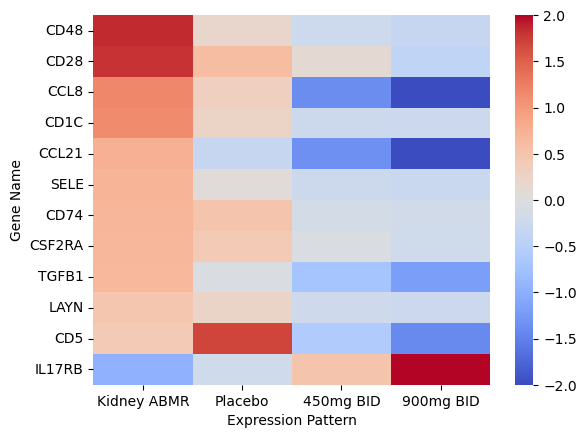

In [183]:


def makethreeheatmap(table, drug1_column, drug2_column, name_of_drug1, name_of_drug2, top_number=None):
    
#     table['mixlog'] = table['logchange'] + table[drug_column]
    table = table.sort_values("logchange", ascending=False)
    list_of_genes = ["CCL21", "CCL8", "CD1C", "CD28", "CD48", "CD5", "CD74", "CSF2RA", "IL17RB", "LAYN", "SELE","TGFB1"]
    table = table[table["Gene Name"].isin(list_of_genes)]
    log_fold_placebo = {'Name': list_of_genes,
                        'placebo_fold_change':[-0.315025, 0.32567, 0.235755, 0.602721667, 0.176216667, 1.690631667, 0.51182, 0.41599, 
                        -0.199645, 0.220466667, 0.05686, -0.06146]}
    log_fold_placebo = pd.DataFrame.from_dict(log_fold_placebo)
    table = table.merge(log_fold_placebo, how='inner', on=None, left_on="Gene Name", right_on="Name", left_index=False, right_index=False)
    new_table = table[["Gene Name", "logchange", "log2FoldChange_x", "log2FoldChange_y", "placebo_fold_change"]]
    new_table.rename(columns={"logchange": 'ABMR_Log_Change', 'log2FoldChange_x': '450mg BID Log Change', 
                             'log2FoldChange_y': '900mg BID Log Change', 'placebo_fold_change': 'Placebo Log Change'}, inplace=True)
    
    new_table.to_excel('/Users/rishabhgoel/Desktop/ABMR Report Raw Data/Heatmap Data Kidney ABMR, 450mg, and 900mg.xlsx', index=False)     
#     table_head = table.head(12) 
#     table_tail = table.tail(13) 
#     table = pd.concat([table_head, table_tail])
    if top_number:
        table = table.sample(top_number, random_state=42)       
    disease_columns = table[["Gene Name", "logchange"]]
    disease_columns["Expression Pattern"] = "Kidney ABMR"
    
    placebo_columns = table[["Gene Name", 'placebo_fold_change']]
    placebo_columns["Expression Pattern"] = "Placebo"
    placebo_columns = placebo_columns.rename(columns={'placebo_fold_change':"logchange"})

    drug1_columns = table[["Gene Name", drug1_column]]
    drug1_columns["Expression Pattern"] = name_of_drug1
    drug1_columns = drug1_columns.rename(columns={drug1_column:"logchange"})
#     drugname = name_of_drug1

    drug2_columns = table[["Gene Name", drug2_column]]
    drug2_columns["Expression Pattern"] = name_of_drug2
    drug2_columns = drug2_columns.rename(columns={drug2_column:"logchange"})
    
    

    final_heatmap = pd.concat([disease_columns, placebo_columns, drug1_columns, drug2_columns])
    final_heatmap = final_heatmap.pivot("Gene Name", "Expression Pattern", "logchange")
    column_order = ['Kidney ABMR', "Placebo", "450mg BID", "900mg BID"]
    final_heatmap = final_heatmap.reindex(column_order, axis=1)
    print(final_heatmap)
    final_heatmap = final_heatmap.sort_values('Kidney ABMR', ascending=False)

    sns.heatmap(final_heatmap , cmap="coolwarm", vmin=-2, vmax=+2)
#     string = "Reciprocal" + name_of_drug + ".png"
    
p450and900 = makethreeheatmap(only_450_900, 'log2FoldChange_x', "log2FoldChange_y", "450mg BID", "900mg BID")




/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/2284541881.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table.rename(columns={"logchange": 'ABMR_Log_Change', 'log2FoldChange': 'GEn1E-1124'}, inplace=True)


Expression Pattern  Kidney ABMR  GEn-1124 (RNA-Seq)
Gene Name                                          
ACKR1                  1.225526           -0.425452
ANKRD1                 1.840000            0.749113
APOBEC3G               1.020000           -1.213847
CD37                   1.355402           -1.544997
CD38                   1.316969           -0.478977
CDH13                  1.056587            0.204116
CORO1A                 1.364365           -0.686100
CXCL10                 2.055996           -4.500982
CXCL11                 2.269632           -2.565628
GBP4                   1.273582           -2.734770
GMFG                   1.033867            0.190516
HCLS1                  1.006909           -0.424801
IL7R                   1.256826           -0.390483
IRF1                   1.013959            0.707819
ITGA4                  1.309910            0.253935
KLHL6                  1.022730            1.437805
PDCD1LG2               1.015541           -0.145404
SERPINB9    

/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/2284541881.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_columns["Expression Pattern"] = "Kidney ABMR"
/var/folders/cd/1pn_n69n5vzf7yz6_fmnrkjr0000gp/T/ipykernel_2798/2284541881.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_columns["Expression Pattern"] = name_of_drug


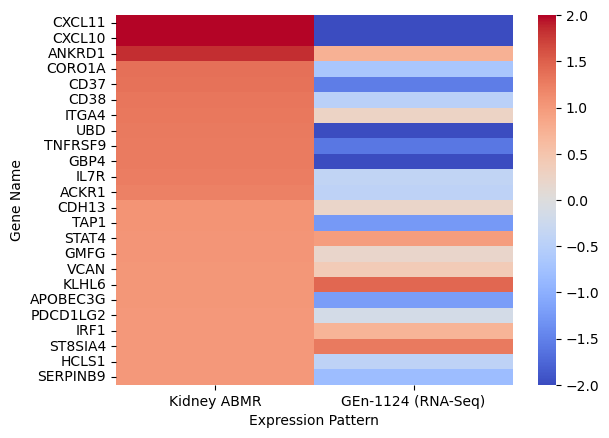

In [184]:
def makeheatmap(table, drug_column, name_of_drug, top_number=None):
    table['mixlog'] = table['logchange'] + table[drug_column]
#     table['absolute']=table['logchange'].apply(abs)
    table = table.sort_values("logchange", ascending=False)
    table_head = table.head(12) 
    table_tail = table.tail(12) 
    table = pd.concat([table_head, table_tail])
    
    new_table = table[["Gene Name", "logchange", "log2FoldChange"]]
    new_table.rename(columns={"logchange": 'ABMR_Log_Change', 'log2FoldChange': 'GEn1E-1124'}, inplace=True)
    
    new_table.to_excel('/Users/rishabhgoel/Desktop/ABMR Report Raw Data/Heatmap Data Kidney ABMR, GEn1E-1124.xlsx', index=False)
    
    if top_number:
        table = table.sample(top_number, random_state=42)       
    disease_columns = table[["Gene Name", "logchange"]]
    disease_columns["Expression Pattern"] = "Kidney ABMR"

    drug_columns = table[["Gene Name", drug_column]]
    drug_columns["Expression Pattern"] = name_of_drug
    drug_columns = drug_columns.rename(columns={drug_column:"logchange"})
    drugname = name_of_drug
#     print(drugname)
    final_heatmap = pd.concat([disease_columns, drug_columns])
    
    
    
    
#     pos_final_heatmap = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] >= 0)) | 
#                                   ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] <= 0))]
    
#     neg_final_heatmap = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] <= 0)) | 
#                                   ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] >= 0))]  
    
#     non_reciprocal_pos = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] <= 0)) | 
#                                   ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] <= 0))]
    
#     non_reciprocal_neg = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] >= 0)) | 
#                                   ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] >= 0))]
    
    
    
#     non_reciprocal_pos = non_reciprocal_pos[non_reciprocal_pos.duplicated('Gene Name', keep=False)] 
    
#     non_reciprocal_neg = non_reciprocal_neg[non_reciprocal_neg.duplicated('Gene Name', keep=False)]  
    
#     non_reciprocal_heatmap = pd.concat([non_reciprocal_pos, non_reciprocal_neg])
    
#     non_reciprocal_heatmap = non_reciprocal_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    
#     pos_final_heatmap = pos_final_heatmap[pos_final_heatmap.duplicated('Gene Name', keep=False)] 
    
#     neg_final_hospital = neg_final_heatmap[neg_final_heatmap.duplicated('Gene Name', keep=False)]
        
#     final_heatmap = pd.concat([pos_final_heatmap, neg_final_hospital])
    
# #     mixed_heatmap = pd.concat([final_heatmap, non_reciprocal_heatmap])
    
# #     
    
    
    
    
    final_heatmap = final_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    column_order = ['Kidney ABMR', "GEn-1124 (RNA-Seq)"]
    final_heatmap = final_heatmap.reindex(column_order, axis=1)
    print(final_heatmap)
    
#     print(final_heatmap)
    final_heatmap = final_heatmap.sort_values('Kidney ABMR', ascending=False)
    
#     non_reciprocal_heatmap = non_reciprocal_heatmap.sort_values('ABMR', ascending=False)
    
#     all_data = pd.merge(final_heatmap, non_reciprocal_heatmap, left_index=True,right_index=True )
    print(final_heatmap)
#     fig, ax = plt.subplots(figsize=(8, 20))
    sns.heatmap(final_heatmap , cmap="coolwarm", vmin=-2, vmax=+2)
    string = "Reciprocal" + name_of_drug + ".png"
#     plt.savefig(string)
#   fig, ax = plt.subplots(figsize=(11, 9))
    
#     sns.heatmap(final_heatmap, cmap="coolwarm", vmin=-2, vmax=+2)

# average_p900_p450_heatmap = makeheatmap(average_merge_450_900, 'average', "P_450_900_average")
# p900_p450_p450_heatmap = makeheatmap(merge_450_900_450, 'log2FoldChange_x', "P_450_900_450")
# p900_p450_p900_heatmap = makeheatmap(merge_450_900_900, 'log2FoldChange_y', "P_450_900_900")
# p450_heatmap = makeheatmap(merge_450, 'log2FoldChange', "P450")
# p900_heatmap = makeheatmap(merge_900, 'log2FoldChange', "P900")
sf7044_heatmap = makeheatmap(merge_sf7044, 'log2FoldChange', "GEn-1124 (RNA-Seq)")
# sf7009_heatmap = makeheatmap(merge_sf7009, 'log2FoldChange', "SF7009")
# sf6222_heatmap = makeheatmap(merge_sf6222, 'log2FoldChange', "SF6222")
# um101_heatmap = makeheatmap(merge_um101, 'log2FoldChange', "UM101")

In [185]:
def create_table(disease_column):
    
    global average_merge_450_900
    global merge_450
    global merge_900
    global merge_sf7044
    
    average_p900_p450_corr, _ = pearsonr(average_merge_450_900[disease_column], average_merge_450_900["average"])

    p450_corr, _ = pearsonr(merge_450[disease_column], merge_450["log2FoldChange"])

    p900_corr, _ = pearsonr(merge_900[disease_column], merge_900["log2FoldChange"])

    sf7044_corr, _ = pearsonr(merge_sf7044[disease_column], merge_sf7044["log2FoldChange"])
    
    dict_of_correlations = {'Compound Dataset': ["GEn-1124 Proteomics 450mg BID", "GEn-1124 Proteomics 900mg BID", 
                                                "GEn-1124 Proteomics Average (of 450 BID and 900 BID)", 
                                               "GEn-1124 RNA-Seq"],
                            'Count of Protein/Gene overlap with ABMR Kidney': [len(merge_450), len(merge_900), 
                            len(average_merge_450_900), len(merge_sf7044)],
                            'Correlation with ABMR Kidney': [p450_corr, p900_corr, average_p900_p450_corr, sf7044_corr]}
    
    correlation_table = pd.DataFrame.from_dict(dict_of_correlations)
    print(correlation_table)
    merge_450 = merge_450[["Gene Name", disease_column, "log2FoldChange"]]
    merge_450.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': '450_log_change'}, inplace=True)
    merge_900 = merge_900[["Gene Name", disease_column, "log2FoldChange"]]
    merge_900.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': '900_log_change'}, inplace=True)
    average_merge_450_900 = average_merge_450_900[["Gene Name", disease_column, "average"]]
    average_merge_450_900 = average_merge_450_900.rename(columns={disease_column: 'ABMR_Log_Change', "average": 'avg_450_900_log_change'})
    merge_sf7044 = merge_sf7044[["Gene Name", disease_column, "log2FoldChange"]]
    merge_sf7044.rename(columns={disease_column: 'ABMR_Log_Change', 'log2FoldChange': 'gen1e-1124_log_change'}, inplace=True)
    
#     writer = pd.ExcelWriter('/Users/rishabhgoel/Desktop/ABMR Report Raw Data/Significant ABMR-A Correlation Report.xlsx', engine='xlsxwriter')
#     correlation_table.to_excel(writer, sheet_name='Final Correlation', index=False)
#     merge_450.to_excel(writer, sheet_name='450mg BID Gene Overlap', index=False)
#     merge_900.to_excel(writer, sheet_name='900mg BID Gene Overlap', index=False)
#     average_merge_450_900.to_excel(writer, sheet_name='Avg 450_900 Gene Overlap', index=False)
#     merge_sf7044.to_excel(writer, sheet_name='SF7044 Gene Overlap', index=False)
#     writer.save()
    
create_table("logchange")
    


# sf7044_heatmap = makeheatmap(merge_sf7044, 'log2FoldChange', "GEn-1124 (RNA-Seq)")
# sf7009_heatmap = makeheatmap(merge_sf7009, 'log2FoldChange', "SF7009")
# sf6222_heatmap = makeheatmap(merge_sf6222, 'log2FoldChange', "SF6222")
# um101_heatmap = makeheatmap(merge_um101, 'log2FoldChange', "UM101")

NameError: name 'pearsonr' is not defined

In [ ]:
# def makeheatmap():
average_merge_450_900['mixlog'] = average_merge_450_900['logchange'] + average_merge_450_900['average']
merge_450_900_900['mixlog'] = merge_450_900_900['logchange'] + merge_450_900_900['log2FoldChange_y']
merge_450_900_450['mixlog'] = merge_450_900_450['logchange'] + merge_450_900_450['log2FoldChange_x']


heatmap_columns_disease_450_900_900 = merge_450_900_900[["Gene Name", "logchange"]]
heatmap_columns_disease_450_900_900["Drug_or_disease"] = "Disease"

heatmap_columns_450_900_900 = merge_450_900_900[["Gene Name", "mixlog"]]
heatmap_columns_450_900_900["Drug_or_disease"] = "P_450_900_900"
heatmap_columns_450_900_900 = heatmap_columns_450_900_900.rename(columns={"mixlog":"logchange"})

heatmap_450_900_900 = pd.concat([heatmap_columns_disease_450_900_900, heatmap_columns_450_900_900])
heatmap_450_900_900 = heatmap_450_900_900.pivot("Gene Name", "Drug_or_disease","logchange")
sns.heatmap(heatmap_450_900_900, cmap="coolwarm", vmin=-2, vmax=+2)
# heatmap_450_900_900.pivot("")

In [ ]:
def makereciprocalheatmap(table, drug_column, name_of_drug, top_number=None):
    table['mixlog'] = table['logchange'] + table[drug_column]

    if top_number:
        table = table.sample(top_number, random_state=42)       
    disease_columns = table[["Gene Name", "logchange"]]
    disease_columns["Expression Pattern"] = "ABMR"

    drug_columns = table[["Gene Name", drug_column]]
    drug_columns["Expression Pattern"] = name_of_drug
    drug_columns = drug_columns.rename(columns={drug_column:"logchange"})
    drugname = name_of_drug
#     print(drugname)
    final_heatmap = pd.concat([disease_columns, drug_columns])
    
   
    
    
    
    pos_final_heatmap = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] >= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] <= 0))]
    
    neg_final_heatmap = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] <= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] >= 0))]  
    
    non_reciprocal_pos = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] <= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] <= 0))]
    
    non_reciprocal_neg = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] >= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] >= 0))]
    
    
    
    non_reciprocal_pos = non_reciprocal_pos[non_reciprocal_pos.duplicated('Gene Name', keep=False)] 
    
    non_reciprocal_neg = non_reciprocal_neg[non_reciprocal_neg.duplicated('Gene Name', keep=False)]  
    
    non_reciprocal_heatmap = pd.concat([non_reciprocal_pos, non_reciprocal_neg])
    
    non_reciprocal_heatmap = non_reciprocal_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    
    pos_final_heatmap = pos_final_heatmap[pos_final_heatmap.duplicated('Gene Name', keep=False)] 
    
    neg_final_hospital = neg_final_heatmap[neg_final_heatmap.duplicated('Gene Name', keep=False)]
        
    final_heatmap = pd.concat([pos_final_heatmap, neg_final_hospital])
    
#     mixed_heatmap = pd.concat([final_heatmap, non_reciprocal_heatmap])
    
#     
    
    
    
    
    final_heatmap = final_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    
    
#     print(final_heatmap)
    final_heatmap = final_heatmap.sort_values('ABMR', ascending=False)
    
    non_reciprocal_heatmap = non_reciprocal_heatmap.sort_values('ABMR', ascending=False)
    
#     all_data = pd.merge(final_heatmap, non_reciprocal_heatmap, left_index=True,right_index=True )
    print(final_heatmap)
    fig, ax = plt.subplots(figsize=(8, 20))
    sns.heatmap(final_heatmap , cmap="coolwarm", vmin=-2, vmax=+2)
    string = "Reciprocal" + name_of_drug + ".png"
    plt.savefig(string)
#   fig, ax = plt.subplots(figsize=(11, 9))
    
#     sns.heatmap(final_heatmap, cmap="coolwarm", vmin=-2, vmax=+2)

average_p900_p450_heatmap = makereciprocalheatmap(average_merge_450_900, 'average', "P_450_900_average")
# p900_p450_p450_heatmap = makereciprocalheatmap(merge_450_900_450, 'log2FoldChange_x', "P_450_900_450")
# p900_p450_p900_heatmap = makereciprocalheatmap(merge_450_900_900, 'log2FoldChange_y', "P_450_900_900")
# p450_heatmap = makereciprocalheatmap(merge_450, 'log2FoldChange', "P450")
# p900_heatmap = makereciprocalheatmap(merge_900, 'log2FoldChange', "P900")
# sf7044_heatmap = makereciprocalheatmap(merge_sf7044, 'log2FoldChange', "SF7044")
# sf7009_heatmap = makereciprocalheatmap(merge_sf7009, 'log2FoldChange', "SF7009")
# sf6222_heatmap = makereciprocalheatmap(merge_sf6222, 'log2FoldChange', "SF6222")
# um101_heatmap = makereciprocalheatmap(merge_um101, 'log2FoldChange', "UM101")
# merge_450_900_450.to_csv("/Users/rishabhgoel/Desktop/mergingmix_450_900.csv", index=False)
# --> Driver genes
# --> Largest change


In [ ]:
def makenonheatmap(table, drug_column, name_of_drug, top_number=None):
    table['mixlog'] = table['logchange'] + table[drug_column]

    if top_number:
        table = table.sample(top_number, random_state=42)       
    disease_columns = table[["Gene Name", "logchange"]]
    disease_columns["Expression Pattern"] = "ABMR"

    drug_columns = table[["Gene Name", drug_column]]
    drug_columns["Expression Pattern"] = name_of_drug
    drug_columns = drug_columns.rename(columns={drug_column:"logchange"})
    drugname = name_of_drug
#     print(drugname)
    final_heatmap = pd.concat([disease_columns, drug_columns])
    
   
    
    
    
    pos_final_heatmap = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] >= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] <= 0))]
    
    neg_final_heatmap = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] <= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] >= 0))]  
    
    non_reciprocal_pos = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] <= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] <= 0))]
    
    non_reciprocal_neg = final_heatmap[((final_heatmap["Expression Pattern"] == "ABMR") & (final_heatmap['logchange'] >= 0)) | 
                                  ((final_heatmap["Expression Pattern"] == name_of_drug) & (final_heatmap['logchange'] >= 0))]
    
    
    
    non_reciprocal_pos = non_reciprocal_pos[non_reciprocal_pos.duplicated('Gene Name', keep=False)] 
    
    non_reciprocal_neg = non_reciprocal_neg[non_reciprocal_neg.duplicated('Gene Name', keep=False)]  
    
    non_reciprocal_heatmap = pd.concat([non_reciprocal_pos, non_reciprocal_neg])
    
    non_reciprocal_heatmap = non_reciprocal_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    
    pos_final_heatmap = pos_final_heatmap[pos_final_heatmap.duplicated('Gene Name', keep=False)] 
    
    neg_final_hospital = neg_final_heatmap[neg_final_heatmap.duplicated('Gene Name', keep=False)]
        
    final_heatmap = pd.concat([pos_final_heatmap, neg_final_hospital])
    
#     mixed_heatmap = pd.concat([final_heatmap, non_reciprocal_heatmap])
    
#     
    
    
    
    
    final_heatmap = final_heatmap.pivot("Gene Name", "Expression Pattern","logchange")
    
    
#     print(final_heatmap)
    final_heatmap = final_heatmap.sort_values('ABMR', ascending=False)
    
    non_reciprocal_heatmap = non_reciprocal_heatmap.sort_values('ABMR', ascending=False)
    
#     all_data = pd.merge(final_heatmap, non_reciprocal_heatmap, left_index=True,right_index=True )
    print(non_reciprocal_heatmap)
    fig, ax = plt.subplots(figsize=(8, 10))
    
    sns.heatmap(non_reciprocal_heatmap , cmap="coolwarm", vmin=-2, vmax=+2)
    string = "Non_Reciprocal" + name_of_drug + ".png"
    plt.savefig(string)
#   fig, ax = plt.subplots(figsize=(11, 9))
    
#     sns.heatmap(final_heatmap, cmap="coolwarm", vmin=-2, vmax=+2)

average_p900_p450_heatmap = makenonheatmap(average_merge_450_900, 'average', "P_450_900_average")
# p900_p450_p450_heatmap = makenonheatmap(merge_450_900_450, 'log2FoldChange_x', "P_450_900_450")
# p900_p450_p900_heatmap = makenonheatmap(merge_450_900_900, 'log2FoldChange_y', "P_450_900_900")
# p450_heatmap = makenonheatmap(merge_450, 'log2FoldChange', "P450")
# p900_heatmap = makenonheatmap(merge_900, 'log2FoldChange', "P900")
# sf7044_heatmap = makenonheatmap(merge_sf7044, 'log2FoldChange', "SF7044")
# sf7009_heatmap = makenonheatmap(merge_sf7009, 'log2FoldChange', "SF7009")
# sf6222_heatmap = makenonheatmap(merge_sf6222, 'log2FoldChange', "SF6222")

# um101_heatmap = makenonheatmap(merge_um101, 'log2FoldChange', "UM101")
# png("/Users/rishabhgoel/Desktop/um101_non_reciprocal.png", width = 800, height = 600)

In [ ]:
significantgenes_450 = merge_450[(merge_450['logchange']>1) | (merge_450['logchange']<-1)]
nonreciprocal_450 = significantgenes_450[((significantgenes_450['logchange']>1) & (significantgenes_450['log2FoldChange']>0))| 
                                         ((significantgenes_450['logchange']<-1) & (significantgenes_450['log2FoldChange']<0))]
nonreciprocal_450
# nonreciprocal_450.to_csv('/Users/rishabhgoel/Desktop/significant_450_nonreciprocal_geo.csv', index=False)

In [ ]:
significantgenes_900 = merge_900[(merge_900['logchange']>1) | (merge_900['logchange']<-1)]
nonreciprocal_900 = significantgenes_900[((significantgenes_900['logchange']>1) & (significantgenes_900['log2FoldChange']>0))| 
                                         ((significantgenes_900['logchange']<-1) & (significantgenes_900['log2FoldChange']<0))]
nonreciprocal_900
# significantgenes_900.to_csv('/Users/rishabhgoel/Desktop/significant_900_geo.csv', index=False)

In [ ]:
merge_450_900_significant = significantgenes_900.merge(significantgenes_450, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_450_900_significant.to_csv('/Users/rishabhgoel/Desktop/overlap_450_900_significant_geo.csv', index=False)

In [ ]:
merge_450_900_antireciprocal = nonreciprocal_900.merge(nonreciprocal_450, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_450_900_antireciprocal.to_csv('/Users/rishabhgoel/Desktop/overlap_450_900_significant_antireciprocal_geo.csv', index=False)

In [ ]:
drivers = pd.read_excel("/Users/rishabhgoel/Desktop/antibody-donor paper genes.xlsx")

driver_gene = drivers['Symbol'].to_list()

isra_driver_genes = ['ROBO4', 'GBP4', 'PLA1A', 'SH2D1B', 'CXCL11', 'CCL4', 'WARS', 'FGFBP2', 
                     'APOL3', 'CX3CL1', 'TRDC', 'PRF1', 'CD160', 'IDO1', 'CDH5', 'GNLY', 'CXCL10', 'GBP1', 'CXCL9', 
                    'HLA-F',"LYPD5", "TRDC", "ICAM2", "CD160", "KLRD1", "IDO1", "SIPR5", "GZMB", "GIMAP6"]

new_isra_driver_genes = ['ROBO4', 'GBP4', 'PLA1A', 'SH2D1B', 'CXCL11', 'CCL4', 'WARS', 'FGFBP2', 
                     'APOL3', 'CX3CL1', 'TRDC', 'PRF1', 'CD160', 'IDO1', 'GNLY',"LYPD5", "TRDC", "ICAM2", "CD160", "KLRD1", "IDO1", "SIPR5", "GZMB", "GIMAP6"]

new_sham_driver_genes = ['ROBO4', 'SH2D1B', 'PLA1A', 'S1PR5', 'CX3CL1', 'TRDC', 'LYPD5', 'COL13A1', 'CXCL11', 
                     'CCL4L1', 'FGFBP2', 'KLRF1', 'CCL4', 'CD160', 'TRDV3', 'NCR1',"GNLY", "GBP4"]

driver_genes = concatenated[concatenated['Gene Name'].isin(new_sham_driver_genes)]


# driver_genes = concatenated[(concatenated['logchange']>1)|(concatenated['logchange']<-1)]

driver_genes

In [ ]:
driver_merge_450 = driver_genes.merge(p450_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_um101.to_csv("/Users/rishabhgoel/Desktop/driver_um101_drjeggastudies.csv", index=False)
print(driver_merge_450)
driver_merge_450.corr()

In [ ]:
driver_merge_900 = driver_genes.merge(p900_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_um101.to_csv("/Users/rishabhgoel/Desktop/driver_um101_drjeggastudies.csv", index=False)
print(driver_merge_900)
driver_merge_900.corr()
# driver_merge_450

In [ ]:
driver_merge_um101 = driver_genes.merge(um101_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_um101.to_csv("/Users/rishabhgoel/Desktop/driver_um101_drjeggastudies.csv", index=False)
print(driver_merge_um101)
driver_merge_um101.corr()

In [ ]:
driver_merge_sf7044 = driver_genes.merge(sf7044_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_um101.to_csv("/Users/rishabhgoel/Desktop/driver_um101_drjeggastudies.csv", index=False)
print(driver_merge_sf7044)
driver_merge_sf7044.corr()

In [ ]:
driver_merge_sf6222 = driver_genes.merge(sf6222_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_um101.to_csv("/Users/rishabhgoel/Desktop/driver_um101_drjeggastudies.csv", index=False)
print(driver_merge_sf6222)
driver_merge_sf6222.corr()

In [ ]:
driver_merge_sf7009 = driver_genes.merge(sf7009_median, how='inner', on=None, left_on="Gene Name", right_on="Gene.name", left_index=False, right_index=False)
# merge_um101.to_csv("/Users/rishabhgoel/Desktop/driver_um101_drjeggastudies.csv", index=False)
print(driver_merge_sf7009)
driver_merge_sf7009.corr()

In [ ]:
list_of_study_genes = concatenated["Gene Name"].to_list()
len(list_of_study_genes)

In [ ]:
list_of_all = list(master_gene_list["Gene"].unique())
list_of_all

In [ ]:
final_dataframe = pd.DataFrame()

for i in list_of_all:
    if i in p450["Gene"].to_list():
        p450_tick.append(1)
        p450_direction.append(p450[(p450["Gene"]==i)]["Direction"].iloc[0])
    else:
        p450_tick.append(0)
        p450_direction.append(np.nan)
        

for i in list_of_all:
    if i in p900["Gene"].to_list():
        p900_tick.append(1)
        p900_direction.append(p900[(p900["Gene"]==i)]["Direction"].iloc[0])
    else:
        p900_tick.append(0)
        p900_direction.append(np.nan)

for i in list_of_all:
    if i in drug["Gene"].to_list():
        drug_tick.append(1)
        try: 
            drug_direction.append(drug[drug["Gene"]==i]["Direction"].iloc[0])
        except:
            drug_direction.append(np.nan)
    else:
        drug_tick.append(0)
        drug_direction.append(np.nan)

for i in list_of_all:
    if i in paper1["Gene"].to_list():
        paper1_tick.append(1)
        paper1_direction.append(np.nan)
    else:
        paper1_tick.append(0)
        paper1_direction.append(np.nan)
        
for i in list_of_all:
    if i in paper2["Gene"].to_list():
        paper2_tick.append(1)
        paper2_direction.append(paper2[(paper2["Gene"]==i)]["Direction"].iloc[0])
    else:
        paper2_tick.append(0)
        paper2_direction.append(np.nan)
        
for i in list_of_all:
    if i in paper3["Gene"].to_list():
        paper3_tick.append(1)
        paper3_direction.append(paper3[(paper3["Gene"]==i)]["Direction"].iloc[0])
    else:
        paper3_tick.append(0)
        paper3_direction.append(np.nan)
        
for i in list_of_all:
    if i in disgenet["Gene"].to_list():
        disgenet_tick.append(1)
        disgenet_direction.append(np.nan)
    else:
        disgenet_tick.append(0)
        disgenet_direction.append(np.nan)

In [ ]:
final_dataframe["Master Genes"] = list_of_all
final_dataframe["P450"] = p450_tick
final_dataframe["P450 Direction"] = p450_direction
final_dataframe["P900"] = p900_tick
final_dataframe["P900 Direction"] = p900_direction
final_dataframe["SF-7044"] = drug_tick
final_dataframe["SF-7044 Direction"] = drug_direction
final_dataframe["Paper 1"] = paper1_tick
final_dataframe["Paper 1 Direction"] = paper1_direction
final_dataframe["Paper 2"] = paper2_tick
final_dataframe["Paper 2 Direction"] = paper2_direction
final_dataframe["Paper 3"] = paper3_tick
final_dataframe["Paper 3 Direction"] = paper3_direction
final_dataframe["Disgenet Graft Rejection "] = disgenet_tick
final_dataframe["Disgenet Direction"] = disgenet_direction

final_dataframe

In [ ]:
final_dataframe.to_csv("/Users/rishabhgoel/Desktop/final_list_ABMR.csv", index=False)